# Decision Trees - Disease Diagnosis

Kyphosis is excessive outward curvature of the spine, causing hunching of the back. Our goal is to predict whether a patient has kyphosis or not given their characteristics.

Here are what the columns represent:

* Kyphosis: absence or presence of kyphosis
* Age: age of the patient in months
* Number: number of vertebrae level affected
* Start: starting vertebrae level

## Data PreProcessing

### Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the kyphosis.csv file and set it to a data frame called df.**

In [2]:
df = pd.read_csv('kyphosis.csv')

**Check out the first couple of rows of the df**

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


**Use info and describe() on df**

In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


**Check out if there are any duplicates in the df**

In [6]:
df.duplicated().sum()

0

**Check out if there are any missing values in the df**

In [7]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

## Train Test Split

Let's split up the data into a training set and a test set!

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[["Age", "Number", "Start"]]
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Algorithm Setup

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)

## Model Training

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Model Testing

In [14]:
predictions = dtree.predict(X_test)

## Model Evaluation

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.75      0.78        12
     present       0.50      0.60      0.55         5

    accuracy                           0.71        17
   macro avg       0.66      0.68      0.66        17
weighted avg       0.72      0.71      0.71        17



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[9 3]
 [2 3]]


- The first row represents the actual 'absent' cases, with 9 correctly predicted as 'absent' (true negatives) and 3 incorrectly predicted as 'present' (false positives).
- The second row represents the actual 'present' cases, with 2 incorrectly predicted as 'absent' (false negatives) and 3 correctly predicted as 'present' (true positives).

Overall, the model has a decent performance with an accuracy of 71%. However, there is room for improvement, especially in correctly identifying the 'present' cases (as indicated by the lower precision and F1-score for the 'present' class).

### Tree Visualization

In [17]:
print(dict(zip(X.columns, dtree.feature_importances_)))

{'Age': 0.3747327410082197, 'Number': 0.21307866520961039, 'Start': 0.41218859378217004}


In [18]:
from sklearn import tree
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 12.50
|   |--- feature_1 <= 4.50
|   |   |--- feature_0 <= 127.50
|   |   |   |--- class: absent
|   |   |--- feature_0 >  127.50
|   |   |   |--- class: present
|   |--- feature_1 >  4.50
|   |   |--- feature_0 <= 51.50
|   |   |   |--- class: absent
|   |   |--- feature_0 >  51.50
|   |   |   |--- class: present
|--- feature_2 >  12.50
|   |--- feature_2 <= 14.50
|   |   |--- feature_0 <= 59.00
|   |   |   |--- class: absent
|   |   |--- feature_0 >  59.00
|   |   |   |--- class: absent
|   |--- feature_2 >  14.50
|   |   |--- class: absent



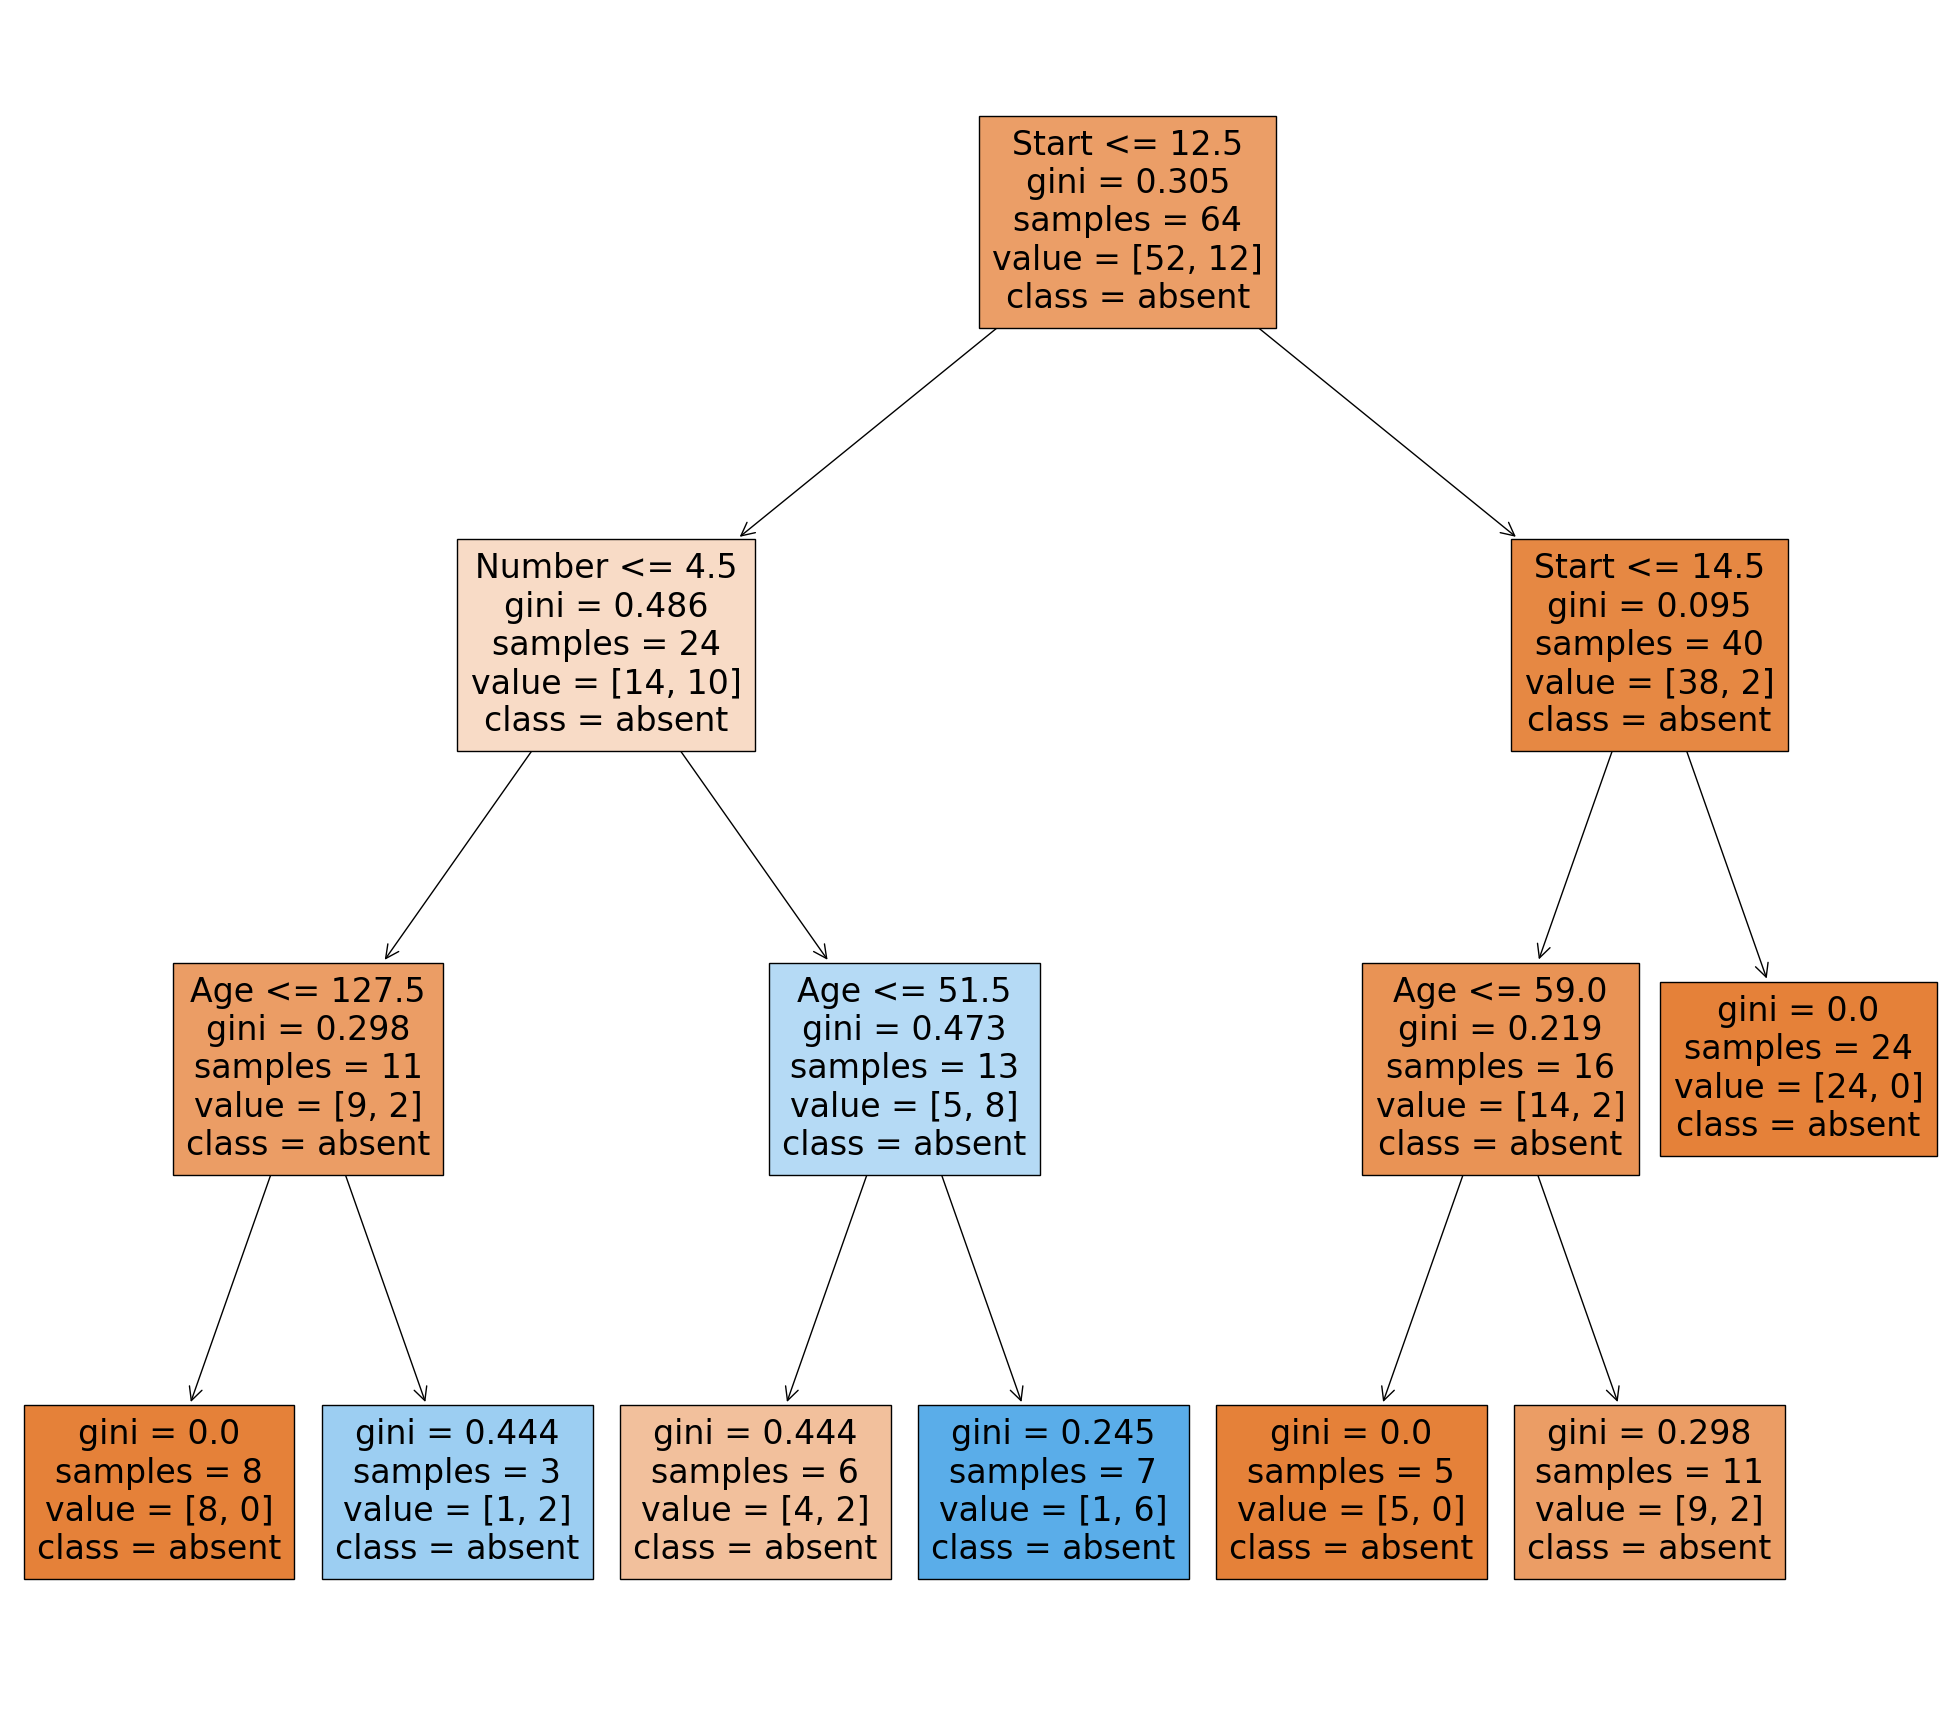

In [19]:
fig = plt.figure(figsize=(25,22))
tree_viz = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=y_train.values,
                   filled=True)

### Random Forest

Now let's compare the decision tree model to a random forest.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [21]:
rfc_pred = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.77      0.83      0.80        12
     present       0.50      0.40      0.44         5

    accuracy                           0.71        17
   macro avg       0.63      0.62      0.62        17
weighted avg       0.69      0.71      0.70        17



In [22]:
print(confusion_matrix(y_test,rfc_pred))

[[10  2]
 [ 3  2]]


- The first row represents the actual 'absent' cases, with 10 correctly predicted as 'absent' (true negatives) and 2 incorrectly predicted as 'present' (false positives).
- The second row represents the actual 'present' cases, with 3 incorrectly predicted as 'absent' (false negatives) and 2 correctly predicted as 'present' (true positives).

Both models have the same overall accuracy of 0.71. The choice between the two models might depend on the specific context of the problem and whether it's more important to minimize false positives or false negatives for the 'present' class.

Let's say that we want to minimize  the misdiagnoses of actually sick patients (i.e., those with 'present' kyphosis) as not sick (i.e., 'absent') - since such misdiagnoses can have life threatening implications - we would look at bottom left of the confusion matrix 

- For the decision tree, False Negatives (FN) for 'present': 2 (bottom left)
- For the random forest, False Negatives (FN) for 'present': 3 (bottom left)

That means that with the decision tree, there is one less sick patient who is misdiagnosed as not sick. 